In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython import display
import sys
import os
import dlib
import glob
from skimage import io
from skimage.draw import circle
from skimage.io import imread_collection
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import matplotlib.image as mpimg

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Focused_dir = '/content/drive/MyDrive/Colab_Notebooks/DataSet/LastV/Focused/*.jpg'

UnFocused_dir = '/content/drive/MyDrive/Colab_Notebooks/DataSet/LastV/UnFocused/*.jpg'

Focused_imgs= imread_collection(Focused_dir)
UnFocused_imgs= imread_collection(UnFocused_dir)
# print(type(im_col))

In [3]:
Training_Data = []
Foucsed_Data = []
UnFoucsed_Data=[]
Labels_Data=[]
reye=[]
leye=[]
Foucsed = '/content/drive/MyDrive/Colab_Notebooks/DataSet/Foucsed'
UnFoucsed = '/content/drive/MyDrive/Colab_Notebooks/DataSet/UnFoucsed'

In [36]:
c = 0
c2 = 0

In [9]:
Fpath = "/content/drive/MyDrive/Colab_Notebooks/DataSet/LastV/Focused/"
UnFpath= "/content/drive/MyDrive/Colab_Notebooks/DataSet/LastV/UnFocused/"
for i in os.listdir(Fpath):
  if c == 1500:
    break
  image = cv2.imread(Fpath + i)
  frame= image 
  img = frame.copy()
  if(get_landmarks(img).size == 2):
    print("continue Focused")
    continue
  eyes = GetEyes(img)    
  reye= (cv2.resize(eyes.crop_right_eye(), dsize=(70, 30), interpolation=cv2.INTER_CUBIC))
  leye= (cv2.resize(eyes.crop_left_eye(), dsize=(70, 30), interpolation=cv2.INTER_CUBIC))
  new_array = cv2.hconcat([reye, leye])
  Foucsed_Data.append(new_array)
  Labels_Data.append(1)
c = 0
for i in os.listdir(UnFpath):
  if c == 1500:
    break
  image = cv2.imread(UnFpath + i)
  frame= image
  img = frame.copy()
  if(get_landmarks(img).size == 2):
    print("continue UnFocused")
    continue
  eyes = GetEyes(img)
  reye = cv2.resize(eyes.crop_right_eye(), dsize=(70, 30), interpolation=cv2.INTER_CUBIC)
  leye = cv2.resize(eyes.crop_left_eye(), dsize=(70, 30), interpolation=cv2.INTER_CUBIC)
  new_array = cv2.hconcat([reye, leye])
  UnFoucsed_Data.append(new_array)
  Labels_Data.append(0)
  c+=1

continue UnFocused


In [42]:
j=1
for i in Foucsed_Data:
  status = cv2.imwrite('/content/drive/MyDrive/Colab_Notebooks/DataSet/Eyes/TrainingSet/Foucsed {}.jpg'.format(j),i)
  j+=1

j=1
for i in UnFoucsed_Data:
  status = cv2.imwrite('/content/drive/MyDrive/Colab_Notebooks/DataSet/Eyes/TrainingSet/UnFoucsed {}.jpg'.format(j),i)
  j+=1


Training and testing folders

In [37]:
testF_array = []
testUF_array = []
Fpath = "/content/drive/MyDrive/Colab_Notebooks/DataSet/LastV/Focused/"
UnFpath= "/content/drive/MyDrive/Colab_Notebooks/DataSet/LastV/UnFocused/"
for i in os.listdir(Fpath):
  print (c2, c)
  c+=1
  c2+=1
  if(c2 == 2000):
    break
  image = cv2.imread(Fpath + i)
  frame= image 
  img = frame.copy()
  if(get_landmarks(img).size == 2):
    print("continue Focused")
    continue
  eyes = GetEyes(img)    
  reye= (cv2.resize(eyes.crop_right_eye(), dsize=(70, 30), interpolation=cv2.INTER_CUBIC))
  leye= (cv2.resize(eyes.crop_left_eye(), dsize=(70, 30), interpolation=cv2.INTER_CUBIC))
  new_array = cv2.hconcat([reye, leye])
  if c > 1500:
    testF_array.append(new_array)
    continue
  Foucsed_Data.append(new_array)
  Labels_Data.append(1)
  
c = 0
c2 = 0
for i in os.listdir(UnFpath):
  c+=1
  c2+=1
  print (c2, c)
  if(c2 == 2000):
    break
  image = cv2.imread(UnFpath + i)
  frame= image
  img = frame.copy()
  if(get_landmarks(img).size == 2):
    print("continue UnFocused")
    continue
  eyes = GetEyes(img)
  reye = cv2.resize(eyes.crop_right_eye(), dsize=(70, 30), interpolation=cv2.INTER_CUBIC)
  leye = cv2.resize(eyes.crop_left_eye(), dsize=(70, 30), interpolation=cv2.INTER_CUBIC)
  new_array = cv2.hconcat([reye, leye])
  if c > 1500:
    testUF_array.append(new_array)
    continue
  UnFoucsed_Data.append(new_array)
  Labels_Data.append(0)
 

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 25
26 26
27 27
28 28
29 29
30 30
31 31
32 32
33 33
34 34
35 35
36 36
37 37
38 38
39 39
40 40
41 41
42 42
43 43
44 44
45 45
46 46
47 47
48 48
49 49
50 50
51 51
52 52
53 53
54 54
55 55
56 56
57 57
58 58
59 59
60 60
61 61
62 62
63 63
64 64
65 65
66 66
67 67
68 68
69 69
70 70
71 71
72 72
73 73
74 74
75 75
76 76
77 77
78 78
79 79
80 80
81 81
82 82
83 83
84 84
85 85
86 86
87 87
88 88
89 89
90 90
91 91
92 92
93 93
94 94
95 95
96 96
97 97
98 98
99 99
100 100
101 101
102 102
103 103
104 104
105 105
106 106
107 107
108 108
109 109
110 110
111 111
112 112
113 113
114 114
115 115
116 116
117 117
118 118
119 119
120 120
121 121
122 122
123 123
124 124
125 125
126 126
127 127
128 128
129 129
130 130
131 131
132 132
133 133
134 134
135 135
136 136
137 137
138 138
139 139
140 140
141 141
142 142
143 143
144 144
145 145
146 146
147 147
148 148
149 149
150 150
151 151
152 

In [ ]:
TFpath = "/content/drive/MyDrive/Colab_Notebooks/DataSet/Foucsed/"
TUnFpath= "/content/drive/MyDrive/Colab_Notebooks/DataSet/UnFoucsed/"

testF_array = []
testUF_array = []
for i in os.listdir(TFpath):
  image = cv2.imread(TFpath + i)
  frame= image
  img = frame.copy()
  if(get_landmarks(img).size == 2):
    print("continue Focused")
    continue
  eyes = GetEyes(img)    
  reye= (cv2.resize(eyes.crop_right_eye(), dsize=(70, 30), interpolation=cv2.INTER_CUBIC))
  leye= (cv2.resize(eyes.crop_left_eye(), dsize=(70, 30), interpolation=cv2.INTER_CUBIC))
  new_array = cv2.hconcat([reye, leye])
  testF_array.append(new_array)

for i in os.listdir(TUnFpath):
  image = cv2.imread(TUnFpath + i)
  frame= image
  img = frame.copy()
  if(get_landmarks(img).size == 2):
    print("continue Focused")
    continue
  eyes = GetEyes(img)    
  reye= (cv2.resize(eyes.crop_right_eye(), dsize=(70, 30), interpolation=cv2.INTER_CUBIC))
  leye= (cv2.resize(eyes.crop_left_eye(), dsize=(70, 30), interpolation=cv2.INTER_CUBIC))
  new_array = cv2.hconcat([reye, leye])
  testUF_array.append(new_array)


#shuffle(Training_Data)
#test_array = np.array(test_array)

continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused
continue Focused


In [43]:
j=1
for i in testF_array:
  status = cv2.imwrite('/content/drive/MyDrive/Colab_Notebooks/DataSet/Eyes/Test_imgs/Foucsed.{}.jpg'.format(j),i)
  j+=1

j=1
for i in testUF_array:
  status = cv2.imwrite('/content/drive/MyDrive/Colab_Notebooks/DataSet/Eyes/Test_imgs/UnFoucsed.{}.jpg'.format(j),i)
  j+=1

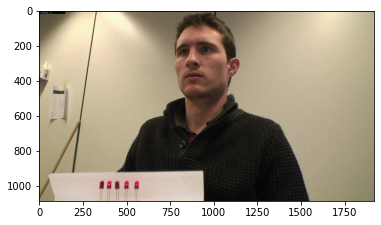

In [ ]:
frame = im_col[0]
plt.imshow(frame)

In [7]:
# dlib face landmarks detection
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/content/drive/MyDrive/Colab_Notebooks/shape_predictor_68_face_landmarks.dat')

class TooManyFaces(Exception):
    pass

class NoFaces(Exception):
    pass

# extract land marks
def get_landmarks(im):
    rects = detector(im, 1)
    
    if len(rects) > 1:
        #raise TooManyFaces
        return np.matrix([0,0])
    if len(rects) == 0:
        #raise NoFaces
        return np.matrix([0,0])

    return np.matrix([[p.x, p.y] for p in predictor(im, rects[0]).parts()])


class GetEyes():
    def __init__(self, img):
        self.img = img.copy()
        landmarks = self.get_landmarks(frame)
        self.left_eye_lms = landmarks[42:47]
        self.right_eye_lms = landmarks[36:41]
        self.left_eye_rect = self.get_rect(self.left_eye_lms)
        self.right_eye_rect = self.get_rect(self.right_eye_lms)

    @staticmethod
    def get_landmarks(im):
        # extract land marks representing the eyes
        rects = detector(im, 1)

        if len(rects) > 1:
          raise TooManyFaces
        if len(rects) == 0:
          raise NoFaces

        return np.matrix([[p.x, p.y] for p in predictor(im, rects[0]).parts()])
    
    @classmethod
    def get_rect(self, landmarks):
        # get rect from eye landmarks
        border = 5
        l_ul_x = min(landmarks[:,0])
        l_ul_y = min(landmarks[:,1])
        l_lr_x = max(landmarks[:,0])
        l_lr_y = max(landmarks[:,1])
        pt1 = (np.sum(l_ul_x)-border, np.sum(l_ul_y)-border)
        pt2 = (np.sum(l_lr_x)+border, np.sum(l_lr_y)+border)
        return [pt1, pt2]
    
    def draw(self):
        # draw rect
        eimg = self.img
        eimg = cv2.rectangle(img, self.right_eye_rect[0], self.right_eye_rect[1], (255, 0, 0),thickness=3) 
        eimg = cv2.rectangle(img, self.left_eye_rect[0], self.left_eye_rect[1], (255, 0, 0),thickness=3) 
        plt.imshow(eimg)
        return eimg
    
    def crop_right_eye(self):
        # crop out right eye
        return self.img[self.right_eye_rect[0][1]:self.right_eye_rect[1][1], self.right_eye_rect[0][0]:self.right_eye_rect[1][0]]
    
    def crop_left_eye(self):
        # crop out left eye
        return self.img[self.left_eye_rect[0][1]:self.left_eye_rect[1][1], self.left_eye_rect[0][0]:self.left_eye_rect[1][0]]


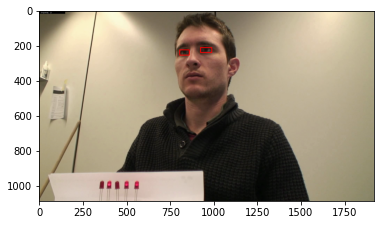

In [ ]:
img = frame.copy()
eyes = GetEyes(img)
plt.imshow(eyes.draw())

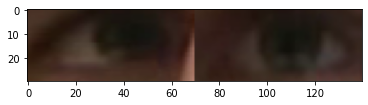

In [ ]:
# frame= cv2.imread(os.path.join(Foucsed, item), cv2.IMREAD_GRAYSCALE)
# img = frame.copy()
# eyes = GetEyes(img)

# a = eyes.crop_left_eye()
# b= eyes.crop_right_eye()

# fig = plt.figure()

# ax1 = fig.add_subplot(2,2,1)
# ax1.imshow(a)
# ax2 = fig.add_subplot(2,2,2)
# ax2.imshow(b)

# na = cv2.resize(a, dsize=(70, 30), interpolation=cv2.INTER_CUBIC)
# nb = cv2.resize(b, dsize=(70, 30), interpolation=cv2.INTER_CUBIC)

# ax1 = fig.add_subplot(2,2,3)
# ax1.imshow(na)

# bb = (na + nb)

# ax2 = fig.add_subplot(2,2,4)
# print('aaaaaaaa')
# ax2.imshow(bb)

frame= im_col[17]
plt.imshow(frame)

img = frame.copy()
eyes = GetEyes(img)

reye = (cv2.resize(eyes.crop_right_eye(), dsize=(70, 30), interpolation=cv2.INTER_CUBIC))
leye = (cv2.resize(eyes.crop_left_eye(), dsize=(70, 30), interpolation=cv2.INTER_CUBIC))



plt.imshow(newImg)

In [8]:
def preprocess(img):
    # preprocess eye images
    if len(img.shape)==3:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    #img = cv2.GaussianBlur(img,(3, 3),0);
    img = cv2.medianBlur(img, 5)
    windowClose = np.ones((5,5),np.uint8)
    windowOpen = np.ones((3,3),np.uint8)
    windowErode = np.ones((3,3),np.uint8)
    img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, windowClose)
    #img = cv2.morphologyEx(img, cv2.MORPH_ERODE, windowErode)
    img = cv2.morphologyEx(img, cv2.MORPH_OPEN, windowOpen)
    #plt.imshow(img)
    return img
    
def detect_pupil(img):
    output = img.copy()
    if len(img.shape)==3:
        # use red channel because of human comlexion
        img = preprocess(img[:,:,0])
    # detect circles in the image
    circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, int(img.shape[1]/3),200,100,8,8)
    
    # ensure at least some circles were found
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")
        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            cv2.circle(output, (x, y), r, (255, 255, 255), 1)
            cv2.rectangle(output, (x - 2, y - 2), (x + 2, y + 2), (255, 0, 0), 1)
    return circles, output

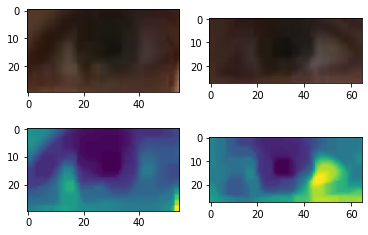

In [ ]:
eye_img_r = eyes.crop_right_eye()
eye_img_l = eyes.crop_left_eye()
proc_r = preprocess(eye_img_r)
proc_l = preprocess(eye_img_l)

# display right and left eye image
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(eye_img_r)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(eye_img_l)
ax1 = fig.add_subplot(2,2,3)
ax1.imshow(proc_r)
ax2 = fig.add_subplot(2,2,4)
ax2.imshow(proc_l)

In [ ]:
Training_Data = Foucsed_Data + UnFoucsed_Data

Training_Data = list(zip(Training_Data, Labels_Data))

shuffle(Training_Data)

Labels_Data = [b for a,b in Training_Data]

Training_Data = [a for a,b in Training_Data]

X = []
y = []

X = Training_Data
y = Labels_Data

#plt.imshow(X[0])
#X = np.array(X).reshape(-1, 50, 50, 1)

In [ ]:
#model = Sequential()
#model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:]))

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=.5,
    decay_steps=10000,
    decay_rate=0.9)
#1e-2
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)
X = np.array(X/255.0)
y= np.array(y)

model = Sequential()

model.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors


#model.add(Conv2D(32, (3, 3)))
model.add(Dense(16))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))


#model.add(Conv2D(64, (3, 3)))
#model.add(Dense(128))
model.add(Dense(16))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

#model.fit(X, y, batch_size=32, epochs=1, verbose=1, validation_split=0.1, shuffle=True)
model.fit(X, y, batch_size=1, epochs=4, verbose=1, validation_split=0.1, shuffle=True)

Epoch 1/4
1306/1306 [==============================] - 4s 2ms/step - loss: 0.7296 - accuracy: 0.4985 - val_loss: 0.7014 - val_accuracy: 0.4795
Epoch 2/4
1306/1306 [==============================] - 2s 2ms/step - loss: 0.7211 - accuracy: 0.5184 - val_loss: 0.6950 - val_accuracy: 0.5205
Epoch 3/4
1306/1306 [==============================] - 2s 2ms/step - loss: 0.7292 - accuracy: 0.4877 - val_loss: 0.7324 - val_accuracy: 0.4795
Epoch 4/4
1306/1306 [==============================] - 2s 2ms/step - loss: 0.7221 - accuracy: 0.5054 - val_loss: 0.7378 - val_accuracy: 0.5205


In [ ]:
plt.imshow(test_array[0])
model.predict(test_array)

NameError: ignored

In [ ]:
# test image
frame = cv2.imread('/content/drive/MyDrive/Colab Notebooks/test.png')
plt.imshow(frame)

In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/Colab_Notebooks/Graduation_Project.ipynb')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.upload(<filename>)

In [ ]:
ar = [4.67923582e-11,
       9.94235277e-04,
       7.23719597e-04,
       1.15892696e-07,
       2.48902211e-06,
       1.49987900e-05,
       1.19957758e-06,
       1.24490512e-07,
       8.60405219e-11,
       3.73708064e-10,
       3.85272292e-14,
       2.27625536e-13,
       1.20521515e-09,
       5.49243850e-07,
       2.72429975e-06,
       1.08092570e-06,
       1.66803598e-04,
       2.78595103e-08,
       7.48097548e-08,
       5.28798061e-10,
       5.49097749e-05,
       1.05688784e-07,
       8.15076575e-08,
       4.11097510e-11,
       4.63847320e-12,
       4.19718127e-09,
       1.26619817e-08,
       1.87726553e-11,
       2.03775841e-09,
       4.74988298e-07,
       1.29534737e-05,
       1.39841432e-05,
       1.27822161e-04,
       1.00000000e+00,
       8.28742981e-03,
       7.67897603e-08,
       8.36651742e-01,
       1.88404442e-06,
       1.62887973e-05,
       3.63534891e-05,
       2.79829523e-12,
       6.28374892e-06,
       5.81108495e-08,
       1.78847770e-09,
       1.41538603e-08,
       1.27976713e-10,
       3.67242109e-07,
       4.18391164e-06,
       3.04607454e-07,
       2.35456923e-07,
       2.25446173e-09,
       3.15680676e-11,
       2.25751262e-09,
       9.38020234e-12,
       3.11285026e-10,
       1.54759831e-12,
       6.28116559e-10,
       5.67065797e-07,
       3.82645133e-08,
       5.83877087e-12,
       2.76465504e-12,
       1.18401378e-09,
       4.34905394e-13,
       1.30377334e-15,
       2.59605857e-12,5.45308758e-08,4.20363676e-06,7.57966205e-08]

for i in ar:
  k = round(i)
  print(k)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [ ]:
pip install patool

     |████████████████████████████████| 81kB 2.9MB/s 


In [ ]:
import patoolib
patoolib.extract_archive("/content/drive/MyDrive/Colab_Notebooks/Toka.rar", outdir="/content/drive/MyDrive/Colab_Notebooks/Toka")

patool: Extracting /content/drive/MyDrive/Colab_Notebooks/Toka.rar ...
patool: running /usr/bin/unrar x -- /content/drive/MyDrive/Colab_Notebooks/Toka.rar
patool:     with cwd='/content/drive/MyDrive/Colab_Notebooks/Toka'
patool: ... /content/drive/MyDrive/Colab_Notebooks/Toka.rar extracted to `/content/drive/MyDrive/Colab_Notebooks/Toka'.


'/content/drive/MyDrive/Colab_Notebooks/Toka'

In [ ]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/Colab_Notebooks/Marvy.zip",'r') as zip_ref: 
  zip_ref.extractall("/content/drive/MyDrive/Colab_Notebooks/Marvy")

In [ ]:
j =0

In [ ]:
import shutil
import os

for i in os.listdir("/content/drive/MyDrive/Colab_Notebooks/Marvy/frames/focused"):
  shutil.move("/content/drive/MyDrive/Colab_Notebooks/Marvy/frames/focused/"+ i, "/content/drive/MyDrive/Colab_Notebooks/DataSet/LastV/Focused/{}.jpg".format(j))
  j+=1

In [ ]:
j

2957